In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m


In [2]:
price=pd.read_excel(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\DATA\Linear Regression.xlsx')

In [3]:
price.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [4]:
price.shape

(21613, 5)

In [5]:
price.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

In [6]:
price.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [7]:
price.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
price,21613.0,540088.141905,367127.195968,75000.0,153500.36,210000.0,245000.0,321950.00,450000.00,645000.0,887000.0,1964400.00,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,720.00,940.0,1090.0,1427.00,1910.00,2550.0,3250.0,4978.80,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,2.00,2.0,2.0,3.00,3.00,4.0,4.0,6.00,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.00,1.0,1.0,1.75,2.25,2.5,3.0,4.25,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.0,1.0,1.00,1.50,2.0,2.0,3.00,3.5


In [23]:
# Ceil for floor and bathrooms(round off)
price['bathrooms']=price['bathrooms'].apply(np.ceil)
price['floors']=price['floors'].apply(np.ceil)

In [24]:
price[price['bedrooms']==price['bedrooms'].max()]

,price,sqft_living,bedrooms,bathrooms,floors
209,464000,2300,6,3.0,2.0
232,315000,2940,6,3.0,1.0
239,472000,4410,6,3.0,1.0
331,279000,2240,6,2.0,2.0
486,1067000,4860,6,4.0,2.0
...,...,...,...,...,...
20984,343000,2732,6,5.0,2.0
21085,677790,2800,6,3.0,2.0
21186,303500,3390,6,5.0,2.0
21375,1174660,4310,6,4.0,2.0


In [14]:
price[price['bedrooms']==price['bedrooms'].min()]

,price,sqft_living,bedrooms,bathrooms,floors
875,1095000,3064,0,0.00,3.5
3119,380000,1470,0,0.00,3.0
3467,288000,1430,0,1.50,3.0
4868,228000,390,0,1.00,1.0
6994,1295648,4810,0,0.00,2.0
8477,339950,2290,0,2.50,2.0
8484,240000,1810,0,2.50,2.0
9773,355000,2460,0,0.00,2.0
9854,235000,1470,0,0.00,2.0
12653,320000,1490,0,2.50,2.0


In [29]:
price[price['bathrooms']==price['bathrooms'].max()]

,price,sqft_living,bedrooms,bathrooms,floors
7252,7700000,12050,6,8.0,3.0
8546,450000,4050,6,8.0,2.0
9254,6885000,9890,6,8.0,2.0
12777,2280000,13540,6,8.0,3.0


In [25]:
# Outlier treatment for bedrooms
percentiles = price['bedrooms'].quantile([0.01,0.99]).values
price['bedrooms']= np.clip(price['bedrooms'], percentiles[0], percentiles[1])

In [33]:
# outlier treatment for bathrooms
percentiles = price['bathrooms'].quantile([0.01,1]).values
price['bathrooms']= np.clip(price['bathrooms'], percentiles[0],percentiles[1])

In [34]:
price.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99,0.999]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,99.9%,max
price,21613.0,540088.141905,367127.195968,75000.0,153500.36,210000.0,245000.0,321950.0,450000.0,645000.0,887000.0,1964400.0,3476301.6,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,720.00,940.0,1090.0,1427.0,1910.0,2550.0,3250.0,4978.8,7289.4,13540.0
bedrooms,21613.0,3.375422,0.866261,2.0,2.00,2.0,2.0,3.0,3.0,4.0,4.0,6.0,6.0,6.0
bathrooms,21613.0,2.439735,0.922621,1.0,1.00,1.0,1.0,2.0,3.0,3.0,3.0,5.0,6.0,8.0
floors,21613.0,1.542405,0.567504,1.0,1.00,1.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,4.0


# Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab38d92630>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab38d92e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab38d924e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab38e6d710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab38e6db38>],
 'means': []}

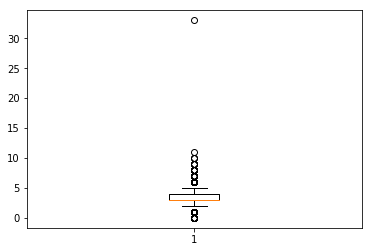

In [9]:
plt.boxplot(price['bedrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab39fe40b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab39fe4978>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab38b1af28>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab38bce208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab38bce630>],
 'means': []}

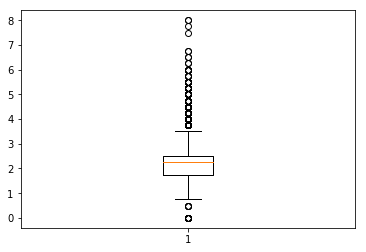

In [10]:
plt.boxplot(price['bathrooms'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab38ae4588>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab38ae4e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab38ae4438>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab38ab36d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab38ab3b00>],
 'means': []}

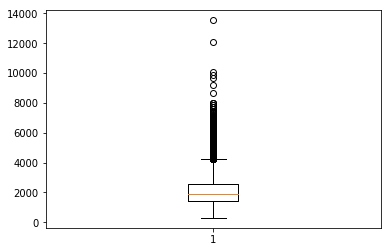

In [11]:
plt.boxplot(price['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1ab3a1cf470>,
 'caps': [<matplotlib.lines.Line2D at 0x1ab3a1cfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ab3a1cf320>],
 'medians': [<matplotlib.lines.Line2D at 0x1ab3a1d65c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ab3a1d69e8>],
 'means': []}

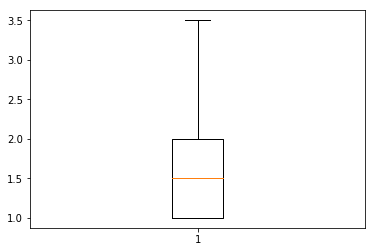

In [12]:
plt.boxplot(price['floors'])

# Making new variables

In [40]:
price['sqft_per_floor']=price['sqft_living']/price['floors']

In [41]:
price['bed_per_floor']=price['bedrooms']/price['floors']
price['bath_per_floor']=price['bathrooms']/price['floors']

In [42]:
price.head()

,price,sqft_living,bedrooms,bathrooms,floors,sqft_per_floor,bed_per_floor,bath_per_floor
0,221900,1180,3,1.0,1.0,1180.0,3.0,1.0
1,538000,2570,3,3.0,2.0,1285.0,1.5,1.5
2,180000,770,2,1.0,1.0,770.0,2.0,1.0
3,604000,1960,4,3.0,1.0,1960.0,4.0,3.0
4,510000,1680,3,2.0,1.0,1680.0,3.0,2.0


In [43]:
# Correlation
price.corr()

,price,sqft_living,bedrooms,bathrooms,floors,sqft_per_floor,bed_per_floor,bath_per_floor
price,1.000000,0.702035,0.317923,0.492256,0.258001,0.411372,-0.045660,0.214739
sqft_living,0.702035,1.000000,0.595504,0.727207,0.329975,0.633454,0.054185,0.370302
bedrooms,0.317923,0.595504,1.000000,0.501998,0.188800,0.412565,0.461981,0.325477
bathrooms,0.492256,0.727207,0.501998,1.000000,0.469517,0.334215,-0.084086,0.536178
floors,0.258001,0.329975,0.188800,0.469517,1.000000,-0.437335,-0.730479,-0.431549
sqft_per_floor,0.411372,0.633454,0.412565,0.334215,-0.437335,1.000000,0.672099,0.765962
bed_per_floor,-0.045660,0.054185,0.461981,-0.084086,-0.730479,0.672099,1.000000,0.635307
bath_per_floor,0.214739,0.370302,0.325477,0.536178,-0.431549,0.765962,0.635307,1.000000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [57]:
X=price.drop(['price','sqft_per_floor','bed_per_floor','bath_per_floor'],axis=1)
Y=price['price']

# OLS

In [59]:
X1=sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [60]:
lr=sm.OLS(Y,X1)

In [61]:
result=lr.fit()

In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     5613.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:16:17   Log-Likelihood:            -2.9990e+05
No. Observations:               21613   AIC:                         5.998e+05
Df Residuals:                   21608   BIC:                         5.999e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.349e+04   7974.445     10.470      0.000    6.79e+04    9.91e+04
sqft_living   321.7790      3.010    106.890      0.000     315.878     327.680
bedrooms      -6.4e+04   2537.484    -25.221      0.000    -6.9e+04    -5.9e+04
bathrooms   -1.385e+04   2981.574     -4.647      0.000   -1.97e+04   -8010.330
floors       2.408e+04   3497.216      6.887      0.000    1.72e+04    3.09e+04
==============================================================================
Omnibus:                    14392.550   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           495965.308
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      25.829   Cond. No.                     1.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__From above summary we can conclude that all the 4 variables are significant for price prediction (as P value<0.05)__

# Modelling

In [55]:
from sklearn.metrics import mean_squared_error,r2_score

In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [69]:
lin_reg=LinearRegression()

In [70]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
Y_pred=lin_reg.predict(X_test)

In [72]:
print('RMSE is: ',np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2 value is: ',r2_score(Y_test,Y_pred))

RMSE is:  250213.56536697282
R2 value is:  0.5122578569699985
